# Missing values

In [32]:
% matplotlib inline 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

In [22]:
# load all csv files of Insead site. Concatenate them..
data_src = "../data"
all_files = glob.glob(os.path.join(data_src, "insead", "*.csv"))
df = pd.concat([pd.read_csv(f, low_memory=False) for f in all_files], ignore_index=True)

# minor changes
df = df.rename(columns={"Time Stamp": "timestamp"})
df = df.replace("\\N", n
                p.nan)

# update data types. object is taken as default
dtypes = dict([(col, np.float64) for col in df.columns])
dtypes["timestamp"] = "datetime64[ns]"
df = df.astype(dtypes)

# change the index to timestamp.
df.index = df.timestamp

In [23]:
(df <= 0.01).sum() * 100 / df.count()

timestamp       0.000000
chwrhdr         0.013505
chwshdr         0.028741
chwsfhdr        0.013158
cwshdr          0.028741
cwrhdr          0.028741
cwsfhdr         0.042592
ch1kw           1.947782
ch2kw           0.608054
ch3kw          99.664116
chwp1kw        18.640188
chwp2kw        37.434814
chwp3kw        50.471623
chwp4kw        99.994112
cwp1kw          0.188372
cwp2kw          0.015582
cwp3kw         98.968505
ct1kw           0.015582
ct2akw         25.079564
incomingkw1     0.013161
incomingkw2     0.014200
rh              0.015586
drybulb         0.014200
chiller_eff     0.383324
cwp_eff         0.482011
chwp_eff        1.104263
ct_eff          0.396136
chwgpmrt        0.372243
cwgpmrt         0.378822
systotpower     0.014197
loadsys         0.370858
effsys          0.371204
hbsys          29.876381
dtype: float64

In [24]:
df.isnull().sum() * 100 / df.count()

timestamp      0.000000
chwrhdr        0.000000
chwshdr        0.000000
chwsfhdr       0.000000
cwshdr         0.000000
cwrhdr         0.000000
cwsfhdr        0.000000
ch1kw          0.000000
ch2kw          0.000000
ch3kw          0.000000
chwp1kw        0.000000
chwp2kw        0.000000
chwp3kw        0.000000
chwp4kw        0.021820
cwp1kw         0.000000
cwp2kw         0.000000
cwp3kw         0.501131
ct1kw          0.000000
ct2akw         0.010043
incomingkw1    0.021820
incomingkw2    0.021820
rh             0.021127
drybulb        0.021127
chiller_eff    0.000000
cwp_eff        0.000000
chwp_eff       0.000000
ct_eff         0.000000
chwgpmrt       0.000000
cwgpmrt        0.000000
systotpower    0.000000
loadsys        0.000000
effsys         0.000000
hbsys          0.000000
dtype: float64

In [37]:
from msmbuilder import hmm

In [31]:
sample = df["2017-01-01":"2017-01-02"]
features = ["loadsys", "drybulb", "rh", "cwrhdr", "cwsfhdr"]
target = "cwshdr"
X = sample[features].values
y = sample[target].values

model = hmm.GaussianHMM()
model.fit(X, y)

MSM contains 6358 strongly connected components above weight=1.00. Component 2700 selected, with population 2.673611%


MarkovStateModel(ergodic_cutoff='on', lag_time=1, n_timescales=None,
         prior_counts=0, reversible_type='mle', sliding_window=True,
         verbose=True)

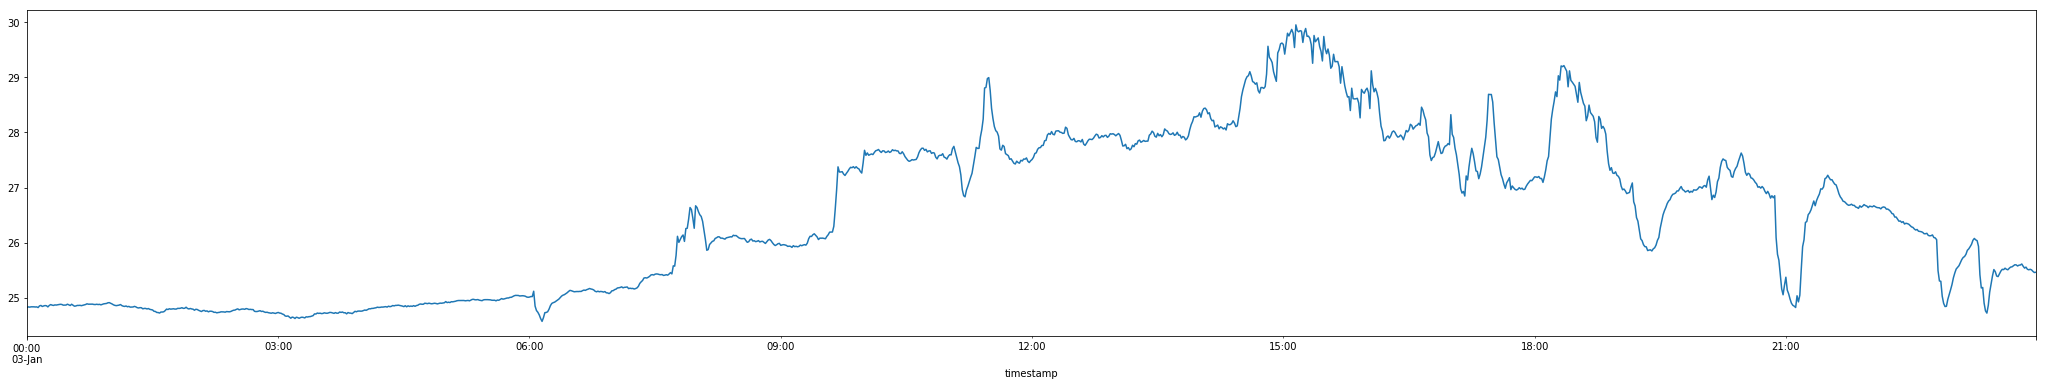

In [33]:
test = df["2017-01-03":"2017-01-03"]
fig, ax = plt.subplots(1,1, figsize=(36,6))
test.cwshdr.plot(ax=ax)